In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("FENGYUN 1C - Sheet1.csv")
df.head()

Saving FENGYUN 1C - Sheet1.csv to FENGYUN 1C - Sheet1.csv


,International Designator,NORAD Catalog Number,Name,Period (minutes),Inclination (degrees),Apogee Height (km),Perigee Height (km),Eccentricity,Latest Data,GP Age (days)
0,1999-025A,25730,FENGYUN 1C,101.03,98.90,814,801,0.000881,NaN,0.52
1,1999-025X,29733,FENGYUN 1C DEB,111.09,99.23,"1,711",843,0.056731,NaN,0.51
2,1999-025Y,29734,FENGYUN 1C DEB,111.56,99.16,"1,764",833,0.060648,NaN,0.54
3,1999-025Z,29735,FENGYUN 1C DEB,112.97,99.38,"1,914",813,0.071111,NaN,1.90
4,1999-025AA,29736,FENGYUN 1C DEB,114.53,99.41,"2,002",866,0.072705,NaN,0.63


In [3]:
print(df.shape)
print(df.columns)
df.info()
df.describe()

(25, 10)
Index(['International Designator', 'NORAD Catalog Number', 'Name',
       'Period (minutes)', 'Inclination (degrees)', 'Apogee Height (km)',
       'Perigee Height (km)', 'Eccentricity', 'Latest Data', 'GP Age (days)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   International Designator  25 non-null     object 
 1   NORAD Catalog Number      25 non-null     int64  
 2   Name                      25 non-null     object 
 3   Period (minutes)          25 non-null     float64
 4   Inclination (degrees)     25 non-null     float64
 5   Apogee Height (km)        25 non-null     object 
 6   Perigee Height (km)       25 non-null     object 
 7   Eccentricity              25 non-null     float64
 8   Latest Data               0 non-null      float64
 9   GP Age (days)             25 non-nul

,NORAD Catalog Number,Period (minutes),Inclination (degrees),Eccentricity,Latest Data,GP Age (days)
count,25.000000,25.000000,25.000000,25.000000,0.0,25.000000
mean,29593.040000,106.687200,98.982400,0.033291,NaN,0.866000
std,804.921501,7.070458,0.396698,0.033943,NaN,0.581944
min,25730.000000,100.080000,98.190000,0.000881,NaN,0.410000
25%,29738.000000,101.460000,98.760000,0.005802,NaN,0.520000
50%,29754.000000,102.650000,98.900000,0.013688,NaN,0.610000
75%,29766.000000,112.970000,99.180000,0.060648,NaN,1.000000
max,29774.000000,121.520000,100.030000,0.102101,NaN,2.770000


In [11]:
if "Latest Data" in df.columns:
    df = df.drop(columns=["Latest Data"])

**Correlation Analysis**

/tmp/ipython-input-1486654340.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-1486654340.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-1486654340.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp/ipython-input-1486654340.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/tmp

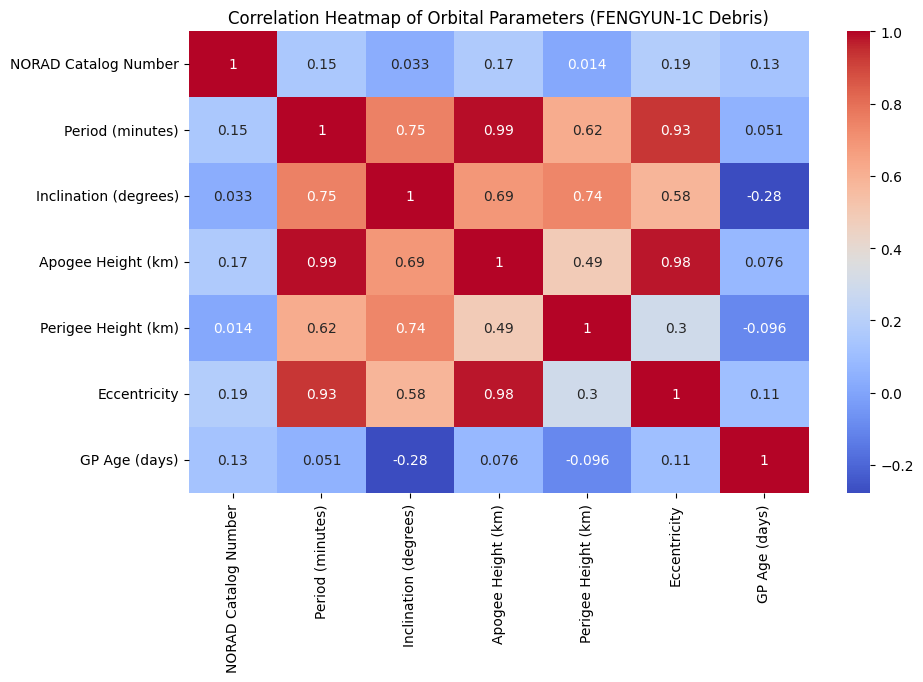

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    df[col] = df[col].astype(str).str.replace(",", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="ignore")

numeric_df = df.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Orbital Parameters (FENGYUN-1C Debris)")
plt.show()


**Orbital Characteristic Analytics**

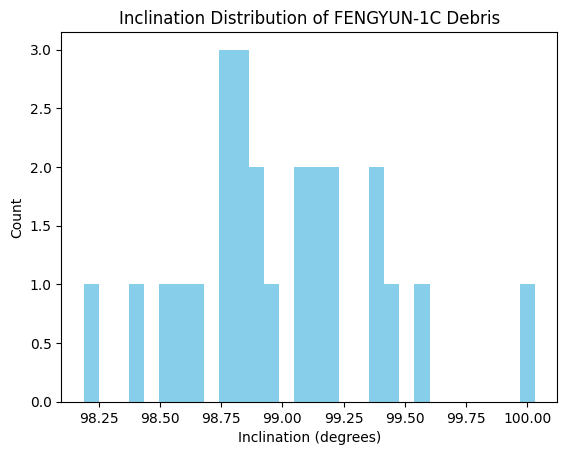

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['Inclination (degrees)'], bins=30, color='skyblue')
plt.title("Inclination Distribution of FENGYUN-1C Debris")
plt.xlabel("Inclination (degrees)")
plt.ylabel("Count")
plt.show()


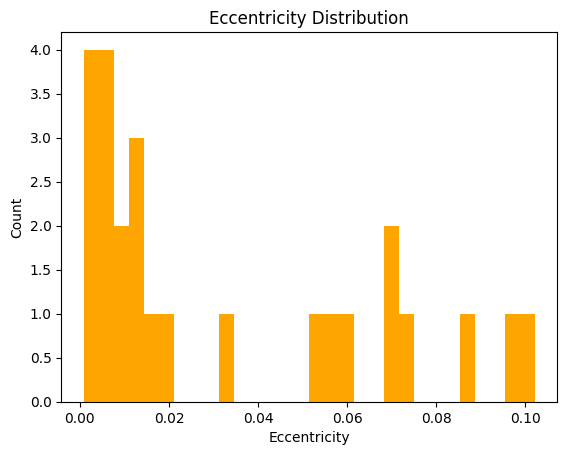

In [14]:
plt.hist(df['Eccentricity'], bins=30, color='orange')
plt.title("Eccentricity Distribution")
plt.xlabel("Eccentricity")
plt.ylabel("Count")
plt.show()


Most debris has high inclination (~98° sun-synchronous orbits)

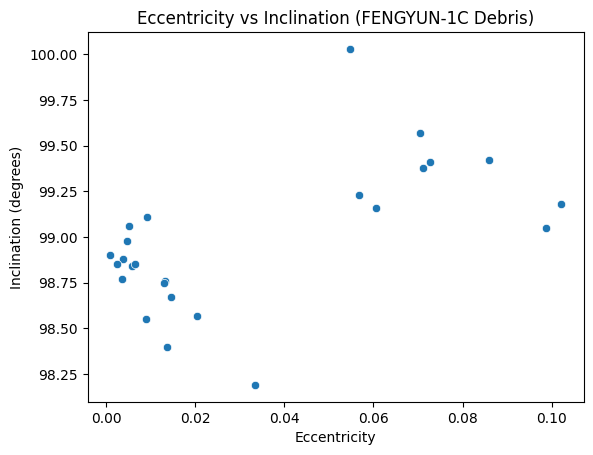

In [28]:
import seaborn as sns

sns.scatterplot(x="Eccentricity", y="Inclination (degrees)", data=df)
plt.title("Eccentricity vs Inclination (FENGYUN-1C Debris)")
plt.show()


**Scatter: Apogee vs Perigee**

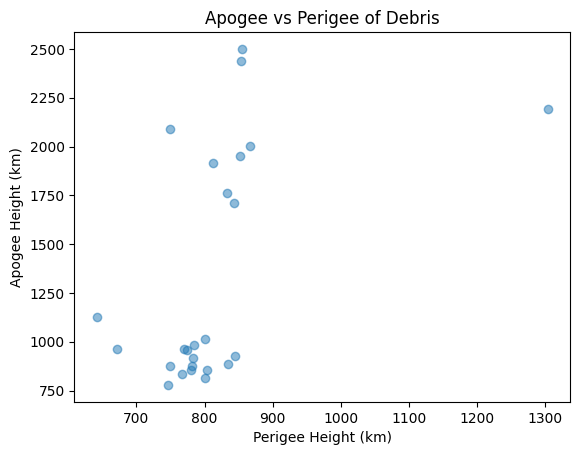

In [33]:
plt.scatter(df["Perigee Height (km)"], df["Apogee Height (km)"], alpha=0.5)
plt.xlabel("Perigee Height (km)")
plt.ylabel("Apogee Height (km)")
plt.title("Apogee vs Perigee of Debris")
plt.show()


Debris clouds cluster in LEO, some with high eccentricity.

**Decay Potential (GP Age vs Perigee)**

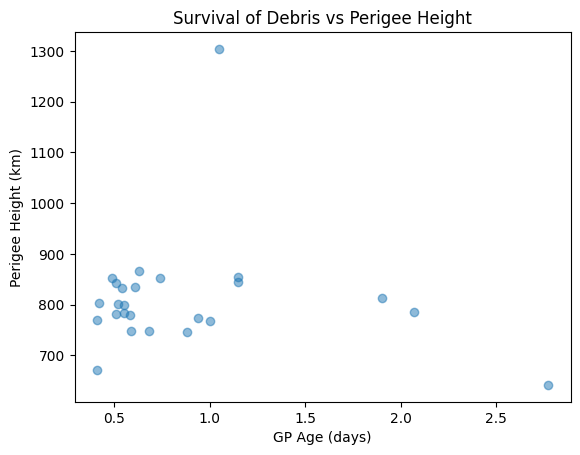

In [34]:
plt.scatter(df["GP Age (days)"], df["Perigee Height (km)"], alpha=0.5)
plt.xlabel("GP Age (days)")
plt.ylabel("Perigee Height (km)")
plt.title("Survival of Debris vs Perigee Height")
plt.show()

Objects with low perigee decay quicker.